<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import matplotlib as plt
# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
#Loading sat_scores.csv

sat_scores = 'sat_scores.csv'
with open(sat_scores, 'r') as f:
    sat_scores = f.read()

clean1 = sat_scores.splitlines()



sat_scores

'State,Rate,Verbal,Math\nCT,82,509,510\nNJ,81,499,513\nMA,79,511,515\nNY,77,495,505\nNH,72,520,516\nRI,71,501,499\nPA,71,500,499\nVT,69,511,506\nME,69,506,500\nVA,68,510,501\nDE,67,501,499\nMD,65,508,510\nNC,65,493,499\nGA,63,491,489\nIN,60,499,501\nSC,57,486,488\nDC,56,482,474\nOR,55,526,526\nFL,54,498,499\nWA,53,527,527\nTX,53,493,499\nHI,52,485,515\nAK,51,514,510\nCA,51,498,517\nAZ,34,523,525\nNV,33,509,515\nCO,31,539,542\nOH,26,534,439\nMT,23,539,539\nWV,18,527,512\nID,17,543,542\nTN,13,562,553\nNM,13,551,542\nIL,12,576,589\nKY,12,550,550\nWY,11,547,545\nMI,11,561,572\nMN,9,580,589\nKS,9,577,580\nAL,9,559,554\nNE,8,562,568\nOK,8,567,561\nMO,8,577,577\nLA,7,564,562\nWI,6,584,596\nAR,6,562,550\nUT,5,575,570\nIA,5,593,603\nSD,4,577,582\nND,4,592,599\nMS,4,566,551\nAll,45,506,514\n'

In [3]:
type(clean1)

list

In [4]:
#Separating header and data
header=clean1[0]
data=clean1[1:]

#spliting the strings on the comma character using built in .split() and storing in split_data
header = header.split(',')
print(header)
split_data = []
for d in data:
    split_data.append(d.split(','))
    

['State', 'Rate', 'Verbal', 'Math']


In [5]:
#Transpose the data to facilitate the creation of dictionary
data1 = np.array(split_data)
data2=data1.transpose()

In [6]:
sat_dict={c:data2[i] for i,c in enumerate(header)}
sat_dict

{'State': array(['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE',
        'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI',
        'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM',
        'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA',
        'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All'], dtype='<U3'),
 'Rate': array(['82', '81', '79', '77', '72', '71', '71', '69', '69', '68', '67',
        '65', '65', '63', '60', '57', '56', '55', '54', '53', '53', '52',
        '51', '51', '34', '33', '31', '26', '23', '18', '17', '13', '13',
        '12', '12', '11', '11', '9', '9', '9', '8', '8', '8', '7', '6',
        '6', '5', '5', '4', '4', '4', '45'], dtype='<U3'),
 'Verbal': array(['509', '499', '511', '495', '520', '501', '500', '511', '506',
        '510', '501', '508', '493', '491', '499', '486', '482', '526',
        '498', '527', '493', '485', '514', '498', '523', '509', '539',
        '534', '539', '527', '543', '56

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [7]:
# Creating sat_score dataframe using pandas

sat_score=pd.read_csv('sat_scores.csv')

sat_score.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


In [8]:
sat_score.dtypes # dtype is used to understand the datatypes of the variables

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

In [9]:
sat_score.shape

(52, 4)

In [10]:
#When using dictionary we can access the values using its keys and the dtypes buildin function is not available in dictionary. 
# Pandas Dataframe has lot of buildin functions like .info(), .dtypes(), isnull(), which could facilitate our EDA. 

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [11]:
#using builtin function .head(num) to look for first 10rows of of dataframe
sat_score.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [12]:
#The data has 4 columns which include state name, rate as well as verbal and Math scores

In [13]:
sat_score.describe()

# we can find 52 rows of data, The mean value of verbal and Math score is is about 532 and has standard deviation of 36.


,Rate,Verbal,Math
count,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000
std,27.301788,33.236225,36.014975
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,504.000000
50%,33.500000,526.500000,521.000000
75%,63.500000,562.000000,555.750000
max,82.000000,593.000000,603.000000


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [14]:
data={'columns':('State','Rate','Verbal','Math'),'types_of_variables':(str,int,int,int),'description':{'State':'Name','Rate':'Acceptance rate', 'Verbal':'Verbal score','Math':'Math score'},'shape':{'rows':53,'columns':5}}


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

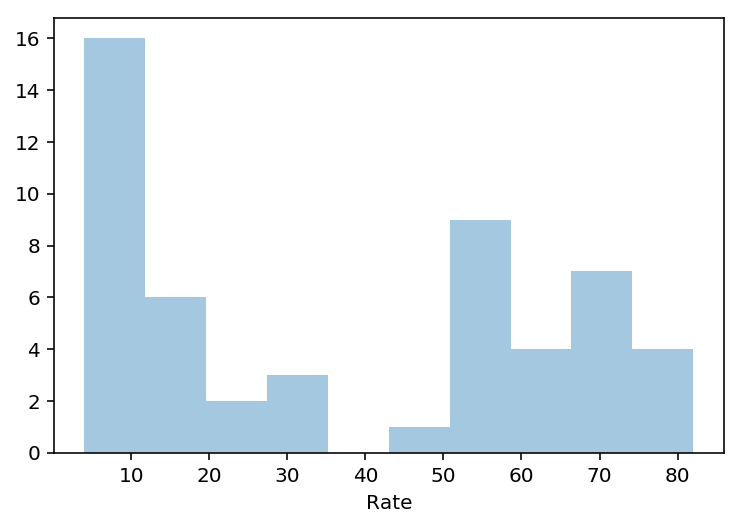

In [15]:
#Distribution of Rate, Math and Verbal scores are plotted using distplot.

import seaborn as sns
%matplotlib inline
sns.distplot(sat_score['Rate'],kde=False,bins=10)

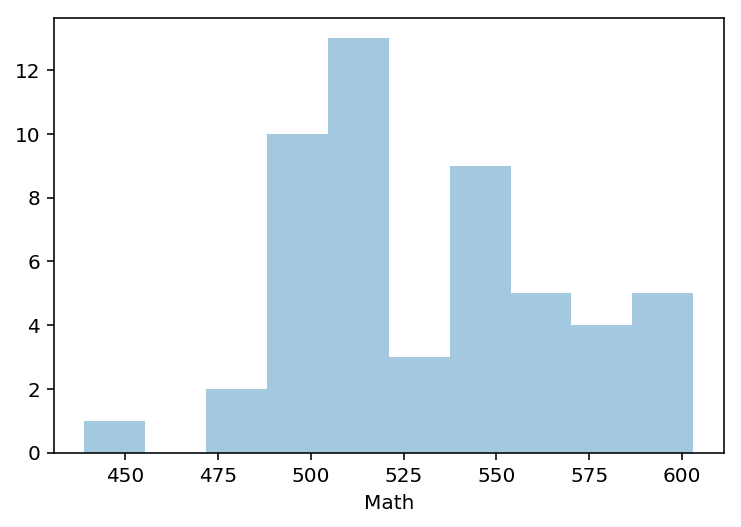

In [16]:
import seaborn as sns
%matplotlib inline
sns.distplot(sat_score['Math'],kde=False,bins=10)


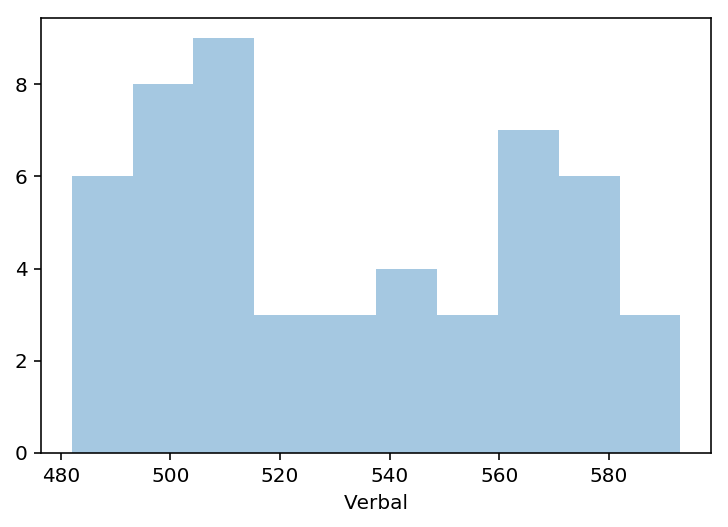

In [17]:

sns.distplot(sat_score['Verbal'],kde=False,bins=10)


### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

The pairplot of sat_score shown below gives us more information about relationship about the variables. 
Both Verabal and Math scores start to decrease with the increase in rate data. The Verbal and Math score has linear realtionship.

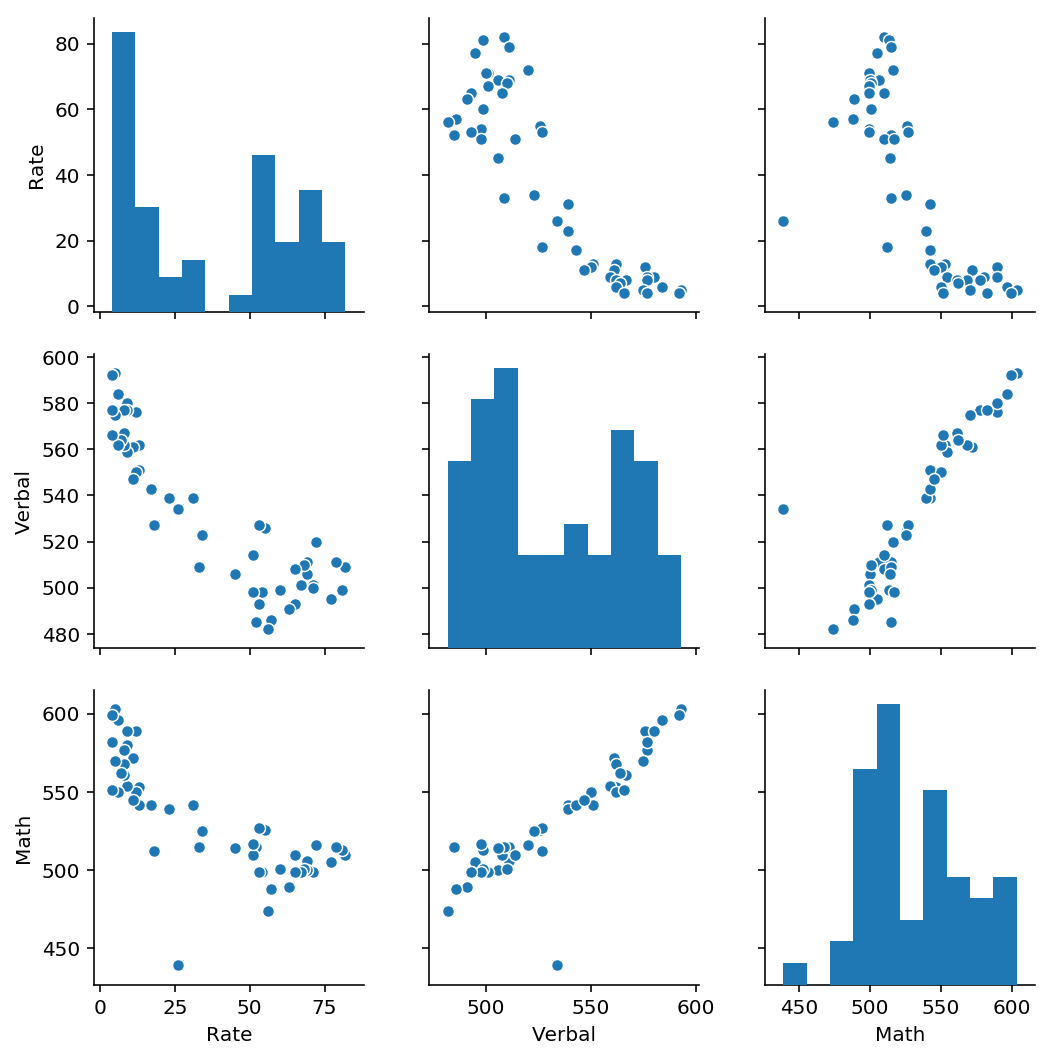

In [18]:
sns.pairplot(sat_score)


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

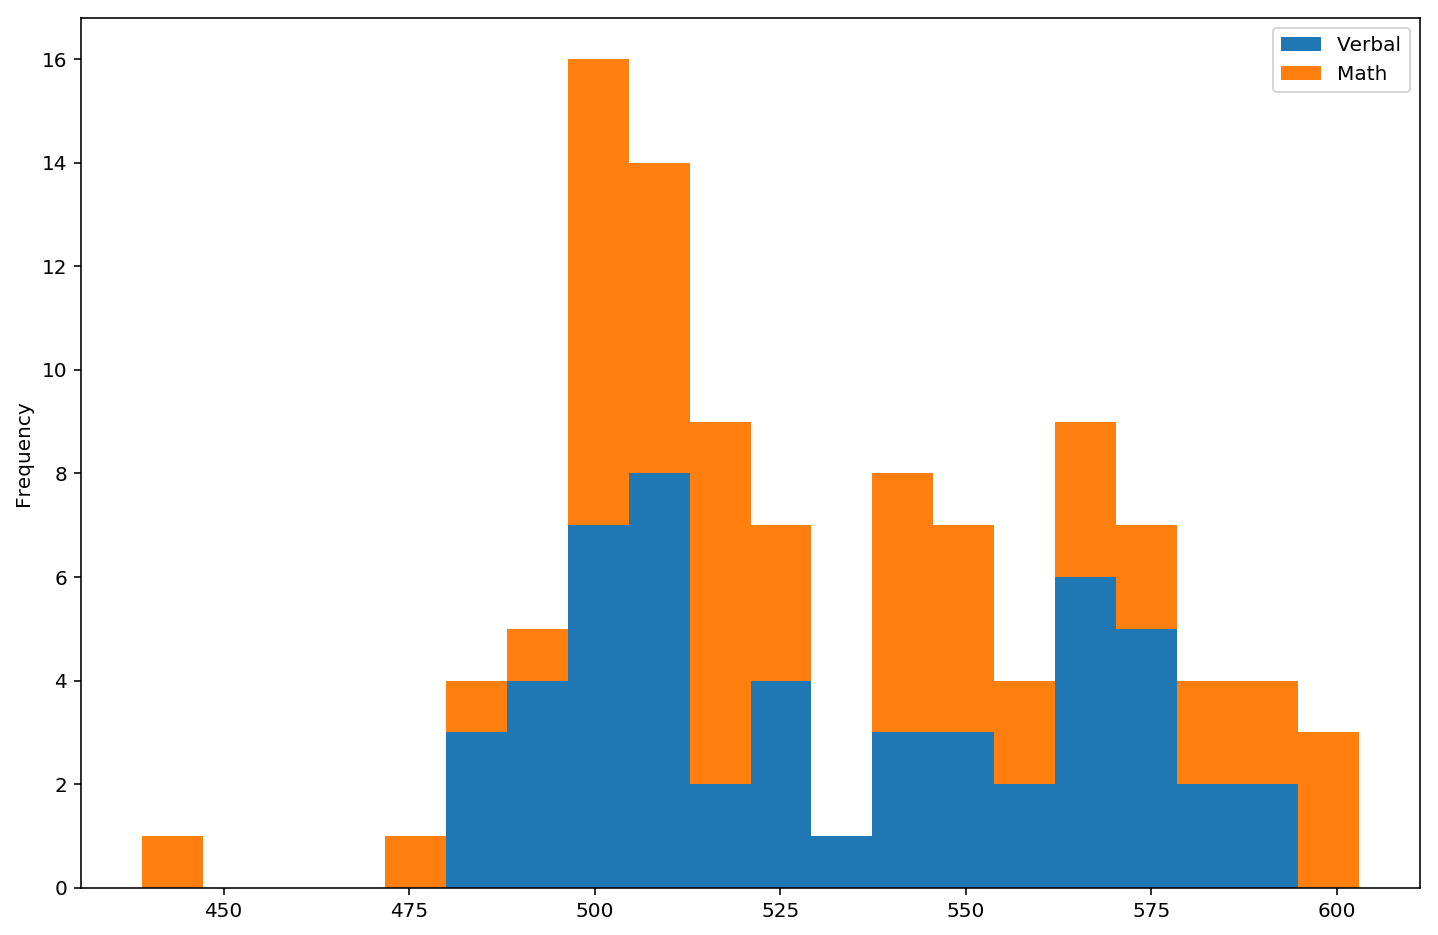

In [19]:
# Plotting stacked histogram using Verbal and Math data from dataframe 
# sat_score[['Verbal','Math']].plot(kind='hist',stacked=True,figsize=(12,6),bins=20)---This is another method
sat_score[['Verbal','Math']].plot.hist(stacked=True, bins=20,figsize=(12,8))

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

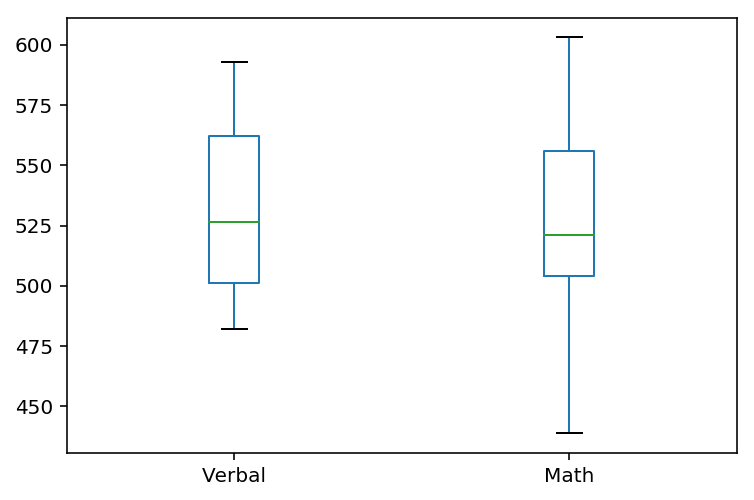

In [20]:
sat_score[['Verbal','Math']].plot.box()

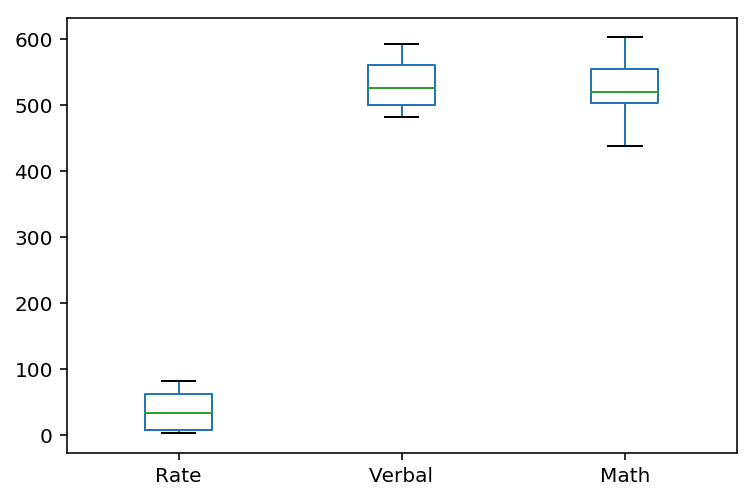

In [21]:
sat_score.plot.box()
# The graph below shows box-plot with Rate, Math and Verbal data. As shown,it is hard to visualize altogether. 
# Because they are of different scale. 

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


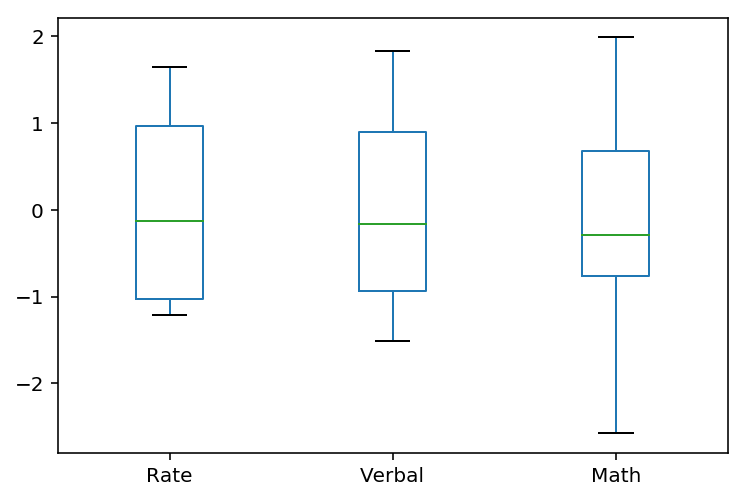

In [22]:
#Rescaling variable is essential before plotting data with different scale. 
# Standardization which makes the distribution of each variable to have a mean of 0 and 
# a standard deviation of 1 is the best way to plot the data points.

sat_score_new=sat_score[['Rate','Verbal','Math']]
sat_score_stand=(sat_score_new-sat_score_new.mean())/sat_score_new.std()
sat_score_stand.plot.box()


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [23]:
verb_avg=np.mean(sat_score['Verbal'])
print(verb_avg)

532.0192307692307


In [24]:
sat_score['Verbal'].shape

(52,)

In [25]:
verb_avg=np.mean(sat_score['Verbal'])
verb_above_avg=sat_score['Verbal']>verb_avg

print(sat_score[verb_above_avg])


   State  Rate  Verbal  Math
26    CO    31     539   542
27    OH    26     534   439
28    MT    23     539   539
30    ID    17     543   542
31    TN    13     562   553
32    NM    13     551   542
33    IL    12     576   589
34    KY    12     550   550
35    WY    11     547   545
36    MI    11     561   572
37    MN     9     580   589
38    KS     9     577   580
39    AL     9     559   554
40    NE     8     562   568
41    OK     8     567   561
42    MO     8     577   577
43    LA     7     564   562
44    WI     6     584   596
45    AR     6     562   550
46    UT     5     575   570
47    IA     5     593   603
48    SD     4     577   582
49    ND     4     592   599
50    MS     4     566   551


In [26]:
print(sat_score[verb_above_avg].shape)

(24, 4)


In [27]:
#List of states that have Verbal scores greater than the average of Verbal scores across states

State_verb_above_avg=sat_score[verb_above_avg]['State']
State_verb_above_avg

26    CO
27    OH
28    MT
30    ID
31    TN
32    NM
33    IL
34    KY
35    WY
36    MI
37    MN
38    KS
39    AL
40    NE
41    OK
42    MO
43    LA
44    WI
45    AR
46    UT
47    IA
48    SD
49    ND
50    MS
Name: State, dtype: object

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [28]:
verb_med=np.median(sat_score['Verbal'])
print(verb_med)

526.5


In [29]:

verb_above_med=sat_score['Verbal']>verb_med

print(sat_score[verb_above_med])

   State  Rate  Verbal  Math
19    WA    53     527   527
26    CO    31     539   542
27    OH    26     534   439
28    MT    23     539   539
29    WV    18     527   512
30    ID    17     543   542
31    TN    13     562   553
32    NM    13     551   542
33    IL    12     576   589
34    KY    12     550   550
35    WY    11     547   545
36    MI    11     561   572
37    MN     9     580   589
38    KS     9     577   580
39    AL     9     559   554
40    NE     8     562   568
41    OK     8     567   561
42    MO     8     577   577
43    LA     7     564   562
44    WI     6     584   596
45    AR     6     562   550
46    UT     5     575   570
47    IA     5     593   603
48    SD     4     577   582
49    ND     4     592   599
50    MS     4     566   551


In [30]:
sat_score[verb_above_med]['State']

19    WA
26    CO
27    OH
28    MT
29    WV
30    ID
31    TN
32    NM
33    IL
34    KY
35    WY
36    MI
37    MN
38    KS
39    AL
40    NE
41    OK
42    MO
43    LA
44    WI
45    AR
46    UT
47    IA
48    SD
49    ND
50    MS
Name: State, dtype: object

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [31]:
sat_score['Verbal_minus_Math']=sat_score['Verbal']-sat_score['Math']
sat_score.head()


,State,Rate,Verbal,Math,Verbal_minus_Math
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [32]:
#df1 is the dataframe with Verbal is greater than Math

df1=sat_score.sort_values('Verbal_minus_Math', ascending=False).head(10)

df1.reset_index(drop=True, inplace=True)
df1

,State,Rate,Verbal,Math,Verbal_minus_Math
0,OH,26,534,439,95
1,MS,4,566,551,15
2,WV,18,527,512,15
3,AR,6,562,550,12
4,NM,13,551,542,9
5,TN,13,562,553,9
6,VA,68,510,501,9
7,DC,56,482,474,8
8,ME,69,506,500,6
9,OK,8,567,561,6


In [33]:
a=df1['State'][0:3]
a

0    OH
1    MS
2    WV
Name: State, dtype: object

In [34]:
df2=sat_score.sort_values('Verbal_minus_Math', ascending=False).tail(10)
df3=df2.sort_values('Verbal_minus_Math', ascending=True)
df3.reset_index(drop=True,inplace=True)

In [35]:
b=df3['State'][0:3]
b.reset_index(drop=True)

0    HI
1    CA
2    NJ
Name: State, dtype: object

In [36]:
print('The top 3 states with Verbal is greater than Math is', a)


The top 3 states with Verbal is greater than Math is 0    OH
1    MS
2    WV
Name: State, dtype: object


In [37]:
print('The top 3 states with Math is greater than Verbal is', b)

The top 3 states with Math is greater than Verbal is 0    HI
1    CA
2    NJ
Name: State, dtype: object


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [38]:

sat_score_new=sat_score.drop(columns=['State','Verbal_minus_Math'],axis=1)

sat_score_new.corr()

#The verbal and math score has negative correlation with rate. However, math and verbal score have positive correlation. 


,Rate,Verbal,Math
Rate,1.000000,-0.886432,-0.773746
Verbal,-0.886432,1.000000,0.899871
Math,-0.773746,0.899871,1.000000


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [39]:
sat_score_new.describe()
#The total numbers of data are 52. The mean, standard deviation 
# and the interquartile range(25,50 and 75 percentile values were given. The std of rate data is very high. 
# It shows that there are outliers present.

,Rate,Verbal,Math
count,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000
std,27.301788,33.236225,36.014975
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,504.000000
50%,33.500000,526.500000,521.000000
75%,63.500000,562.000000,555.750000
max,82.000000,593.000000,603.000000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [40]:
# Both of these covariance and correlation  matrix determine the relationship and measures the dependency between the variables.
# Although there are some similarities between these two, they are different from each other. 

# Covariance is a measure of correlation. On the contrary, correlation refers to the scaled form of covariance 
# and it is dimensionless. 
# Correlation is considered as the best tool for measuring and expressing the quantitative relationship between two variables. 

# Correlation is calculated by dividing the covariance by its standard deviation.

In [41]:
sat_score_new.cov() # As discussed above covariance is the measure of variation and it is 
#difficult to find the correlation between variables

,Rate,Verbal,Math
Rate,745.387632,-804.355958,-760.803922
Verbal,-804.355958,1104.646682,1077.147059
Math,-760.803922,1077.147059,1297.078431


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [42]:
#The data is loaded using pandas
drug=pd.read_csv('drug-use-by-age.csv')

drug.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [43]:
#First the shape of the data is studied
drug.shape #it shows that data has 17 rows and 28 columns

(17, 28)

In [44]:
drug_n=drug.drop('age',axis=1)

In [45]:
drug_n.head()

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,0.1,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,0.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,0.1,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,0.2,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,0.1,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [46]:
#buildin function .dtypes is used to understand the type of the object. 
#It shows that age,cocaine-frequency,crack-frequency,heroin-frequency,inhalant-frequency,
#oxycontin-frequency,meth-frequency data are object type while they are to be float type. So need to clean those data. 

drug_n.dtypes 

n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency           object
crack-use                  float64
crack-frequency             object
heroin-use                 float64
heroin-frequency            object
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency          object
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency         object
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency              object
sedative-use               float64
sedative-frequency         float64
dtype: object

In [47]:
cols = drug_n.columns[drug_n.dtypes.eq('object')]

drug_n[cols] = drug_n[cols].apply(pd.to_numeric, errors='coerce')

In [48]:
drug_n.info() # we could find that all the object types were converted to float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 27 columns):
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          16 non-null float64
crack-use                  17 non-null float64
crack-frequency            14 non-null float64
heroin-use                 17 non-null float64
heroin-frequency           16 non-null float64
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         16 non-null float64
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-frequency        16 non-null float64
tranqu

In [49]:
#the names of the columns were changed
new_names=['n','alcohol_u','alcohol_f','marijuana_u','marijuana_f', 'cocaine_u', 'cocaine_f', 'crack_u','crack_f', 
'heroin_u', 'heroin_f','hallucinogen_u','hallucinogen_f', 'inhalant_u', 'inhalant_f', 'pain-releiver_u', 'pain-releiver_f',
'oxycontin_u','oxycontin_f', 'tranquilizer_u', 'tranquilizer_f', 'stimulant_u', 'stimulant_f', 'meth_u', 'meth_f', 'sedative_u', 'sedative_f']
drug_n.columns=new_names

In [50]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
drug_n.head()

,n,alcohol_u,alcohol_f,marijuana_u,marijuana_f,cocaine_u,cocaine_f,crack_u,crack_f,heroin_u,heroin_f,hallucinogen_u,hallucinogen_f,inhalant_u,inhalant_f,pain-releiver_u,pain-releiver_f,oxycontin_u,oxycontin_f,tranquilizer_u,tranquilizer_f,stimulant_u,stimulant_f,meth_u,meth_f,sedative_u,sedative_f
0,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,NaN,0.1,35.5,0.2,52.0,1.6,19.0,2.0,36.0,0.1,24.5,0.2,52.0,0.2,2.0,0.0,NaN,0.2,13.0
1,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,0.0,NaN,0.6,6.0,2.5,12.0,2.4,14.0,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,NaN,0.1,2.0,1.6,3.0,2.6,5.0,3.9,12.0,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,0.2,1.0,2.1,4.0,2.5,5.5,5.5,10.0,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,0.1,66.5,3.4,3.0,3.0,3.0,6.2,7.0,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [51]:
#As the percentage of the people using drugh is given. 
# These values were converted to number of people by multipling with the corresponding n value. 
drug_n['alcohol_u'] = drug_n['n']*drug_n['alcohol_u']*0.01
drug_n['marijuana_u'] = drug_n['n']*drug_n['marijuana_u']*0.01
drug_n['crack_u']=drug_n['n']*drug_n['crack_u']*0.01
drug_n['heroin_u']=drug_n['n']*drug_n['heroin_u']*0.01
drug_n['hallucinogen_u']=drug_n['n']*drug_n['hallucinogen_u']*0.01
drug_n['inhalant_u']=drug_n['n']*drug_n['inhalant_u']*0.01
drug_n['pain-releiver_u']=drug_n['n']*drug_n['pain-releiver_u']*0.01
drug_n['oxycontin_u']=drug_n['n']*drug_n['oxycontin_u']*0.01
drug_n['tranquilizer_u']=drug_n['n']*drug_n['tranquilizer_u']*0.01
drug_n['stimulant_u']=drug_n['n']*drug_n['stimulant_u']*0.01
drug_n['meth_u']=drug_n['n']*drug_n['meth_u']*0.01
drug_n['sedative_u']=drug_n['n']*drug_n['sedative_u']*0.01
drug_n['cocaine_u']=drug_n['n']*drug_n['cocaine_u']*0.01



In [52]:
drug_n.insert(0,column='age', value=drug['age'])

In [53]:
drug_n

,age,n,alcohol_u,alcohol_f,marijuana_u,marijuana_f,cocaine_u,cocaine_f,crack_u,crack_f,heroin_u,heroin_f,hallucinogen_u,hallucinogen_f,inhalant_u,inhalant_f,pain-releiver_u,pain-releiver_f,oxycontin_u,oxycontin_f,tranquilizer_u,tranquilizer_f,stimulant_u,stimulant_f,meth_u,meth_f,sedative_u,sedative_f
0,12,2798,109.122,3.0,30.778,4.0,2.798,5.0,0.000,NaN,2.798,35.5,5.596,52.0,44.768,19.0,55.960,36.0,2.798,24.5,5.596,52.0,5.596,2.0,0.000,NaN,5.596,13.0
1,13,2757,234.345,6.0,93.738,15.0,2.757,1.0,0.000,3.0,0.000,NaN,16.542,6.0,68.925,12.0,66.168,14.0,2.757,41.0,8.271,25.5,8.271,4.0,2.757,5.0,2.757,19.0
2,14,2792,505.352,5.0,242.904,24.0,2.792,5.5,0.000,NaN,2.792,2.0,44.672,3.0,72.592,5.0,108.888,12.0,11.168,4.5,25.128,5.0,22.336,12.0,2.792,24.0,5.584,16.5
3,15,2956,863.152,6.0,428.620,25.0,14.780,4.0,2.956,9.5,5.912,1.0,62.076,4.0,73.900,5.5,162.580,10.0,23.648,3.0,59.120,4.5,44.340,6.0,8.868,10.5,11.824,30.0
4,16,3058,1226.258,10.0,688.050,30.0,30.580,7.0,0.000,1.0,3.058,66.5,103.972,3.0,91.740,3.0,189.596,7.0,33.638,4.0,73.392,11.0,55.044,9.5,9.174,36.0,6.116,3.0
5,17,3038,1497.734,13.0,850.640,36.0,60.760,5.0,3.038,21.0,3.038,64.0,145.824,3.0,60.760,4.0,258.230,9.0,42.532,6.0,106.330,7.0,85.064,9.0,18.228,48.0,15.190,6.5
6,18,2469,1449.303,24.0,832.053,52.0,79.008,5.0,9.876,10.0,9.876,46.0,172.830,4.0,44.442,4.0,227.148,12.0,41.973,7.0,120.981,12.0,74.070,8.0,12.345,12.0,9.876,10.0
7,19,2223,1436.058,36.0,742.482,60.0,91.143,5.5,11.115,2.0,11.115,180.0,191.178,3.0,31.122,3.0,208.962,12.0,33.345,7.5,93.366,4.5,73.359,6.0,8.892,105.0,6.669,6.0
8,20,2271,1582.887,48.0,772.140,60.0,111.279,8.0,13.626,5.0,20.439,45.0,168.054,2.0,34.065,4.0,227.100,10.0,38.607,12.0,122.634,10.0,90.840,12.0,20.439,12.0,11.355,4.0
9,21,2354,1958.528,52.0,776.820,52.0,112.992,5.0,11.770,17.0,14.124,30.0,148.302,4.0,32.956,2.0,211.860,15.0,30.602,13.5,91.806,7.0,96.514,10.0,14.124,2.0,7.062,9.0


In [54]:
to_drop=['alcohol_f','marijuana_f','cocaine_f','crack_f','heroin_f','hallucinogen_f','inhalant_f','pain-releiver_f','oxycontin_f','tranquilizer_f', 'stimulant_f', 'meth_f', 'sedative_f']

drug_u=drug_n.drop(to_drop, axis=1)

The drugs was classified according to their groups and classified into 5 category. 
1. depressants which include alcohol, transquilizer, oxycontin, sedative
2. stimulants which include cocaine, crack and meth 
3. narcotics which include inhalant, pain-reliever and heroin
4. hallucinogen
5. marijuana


In [55]:
#The derived drug categories  were calculated

derived_drug_u=pd.DataFrame({'age':drug_u['age'],'n':drug_u['n']})

derived_drug_u['depressants']=drug_u['alcohol_u']+drug_u['tranquilizer_u']+drug_u['oxycontin_u']+drug_u['sedative_u']

derived_drug_u['stimulants']=drug_u['cocaine_u']+drug_u['crack_u']+drug_u['meth_u']+drug_u['stimulant_u']

derived_drug_u['narcotics']=drug_u['inhalant_u']+drug_u['pain-releiver_u']+drug_u['heroin_u']

derived_drug_u['hallucinogen']=drug_u['hallucinogen_u']

derived_drug_u['marijuana']=drug_u['marijuana_u']                                      


In [56]:
# The median time frequency consumption of different types of drug was calculated.

derived_drug_f=pd.DataFrame({'age':drug_u['age'],'n':drug_u['n']})

derived_drug_f['depressants']=drug_n['alcohol_f']+drug_n['tranquilizer_u']+drug_n['oxycontin_f']+drug_n['sedative_f']

derived_drug_f['stimulants']=drug_n['cocaine_f']+drug_n['crack_u']+drug_n['meth_f']+drug_n['stimulant_f']

derived_drug_f['narcotics']=drug_n['inhalant_f']+drug_n['pain-releiver_f']+drug_n['heroin_f']

derived_drug_f['hallucinogen']=drug_n['hallucinogen_f']

derived_drug_f['marijuana']=drug_n['marijuana_f']  

derived_drug_f.head()

,age,n,depressants,stimulants,narcotics,hallucinogen,marijuana
0,12,2798,46.096,NaN,90.5,52.0,4.0
1,13,2757,74.271,10.000,NaN,6.0,15.0
2,14,2792,51.128,41.500,19.0,3.0,24.0
3,15,2956,98.120,23.456,16.5,4.0,25.0
4,16,3058,90.392,52.500,76.5,3.0,30.0


### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

Text(0.5,1,'Age Vs Number of people')

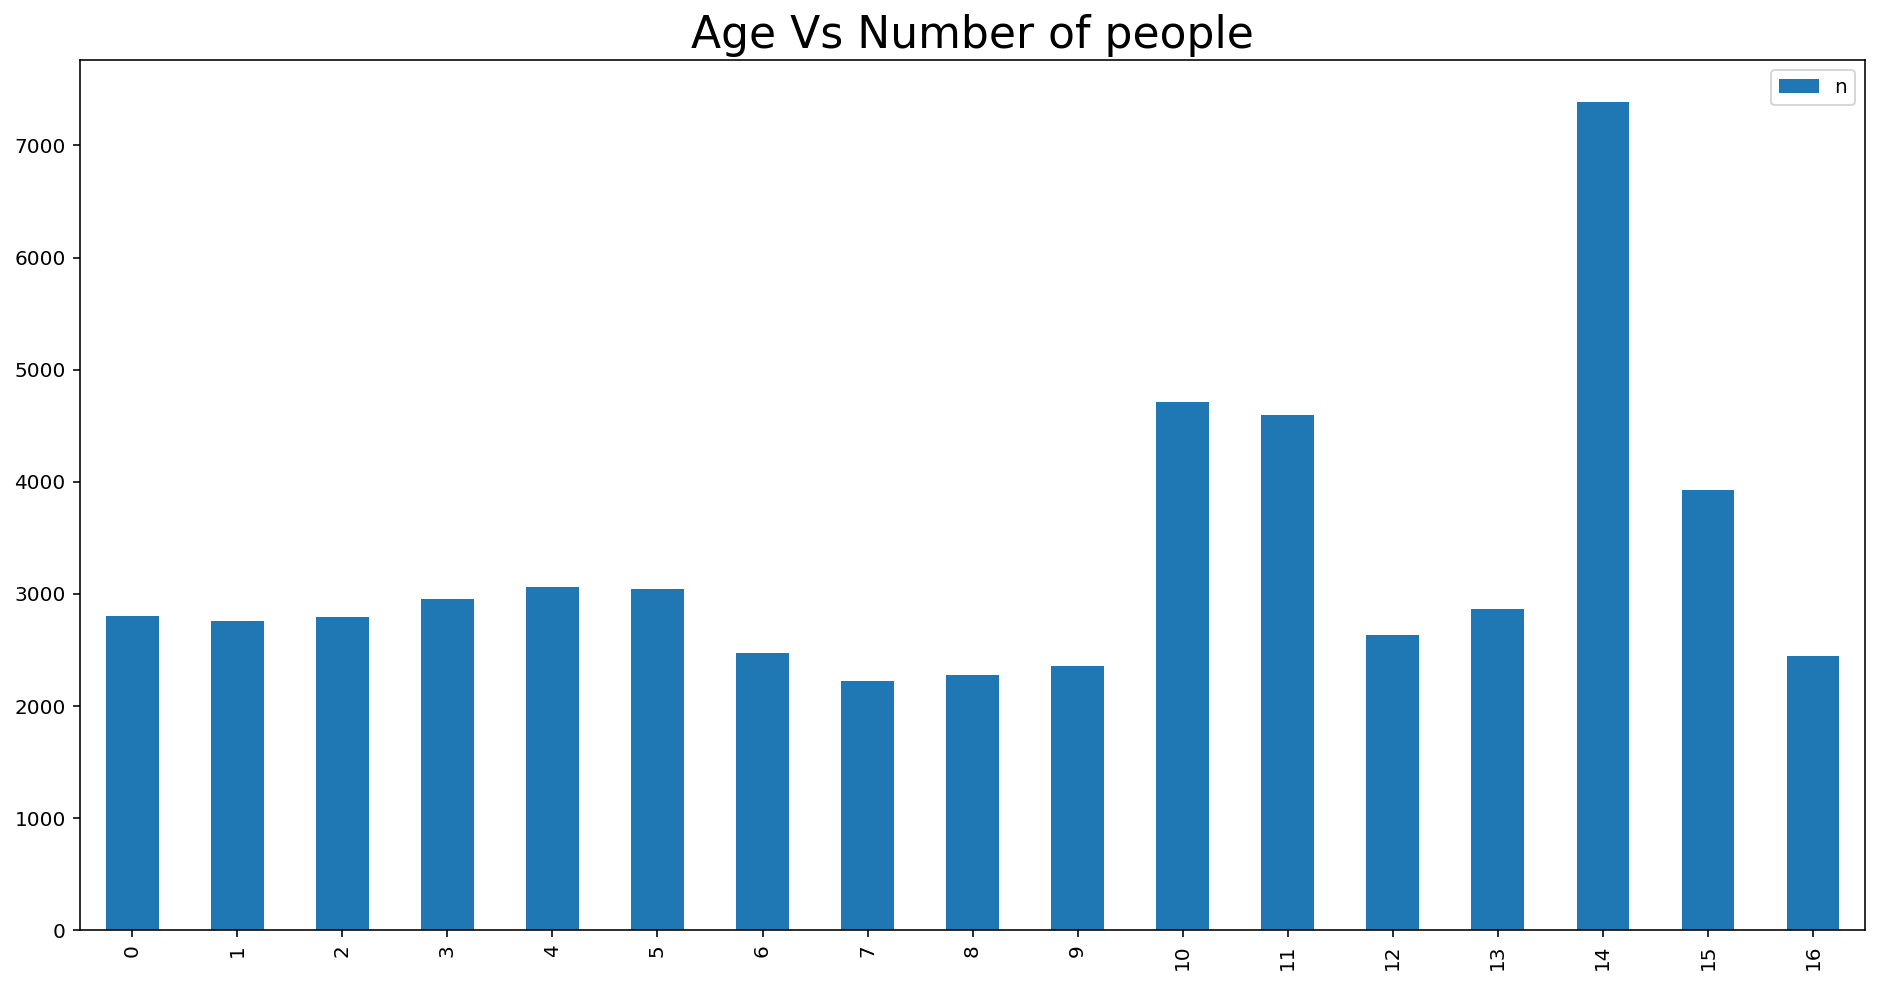

In [57]:
ax=derived_drug_u[['age','n']].plot(kind='bar', figsize=(16,8))

# ax.set_xticklabels('12','13','14','15','16','17','18','19','20','21','22-23','24-25','26-29','30-34','35-49','50-64','65+')

ax.set_title('Age Vs Number of people', fontsize=22)

# As shown in the figure we could see that the consumption of drug is high during 14 which corresponds to age 35-49. 


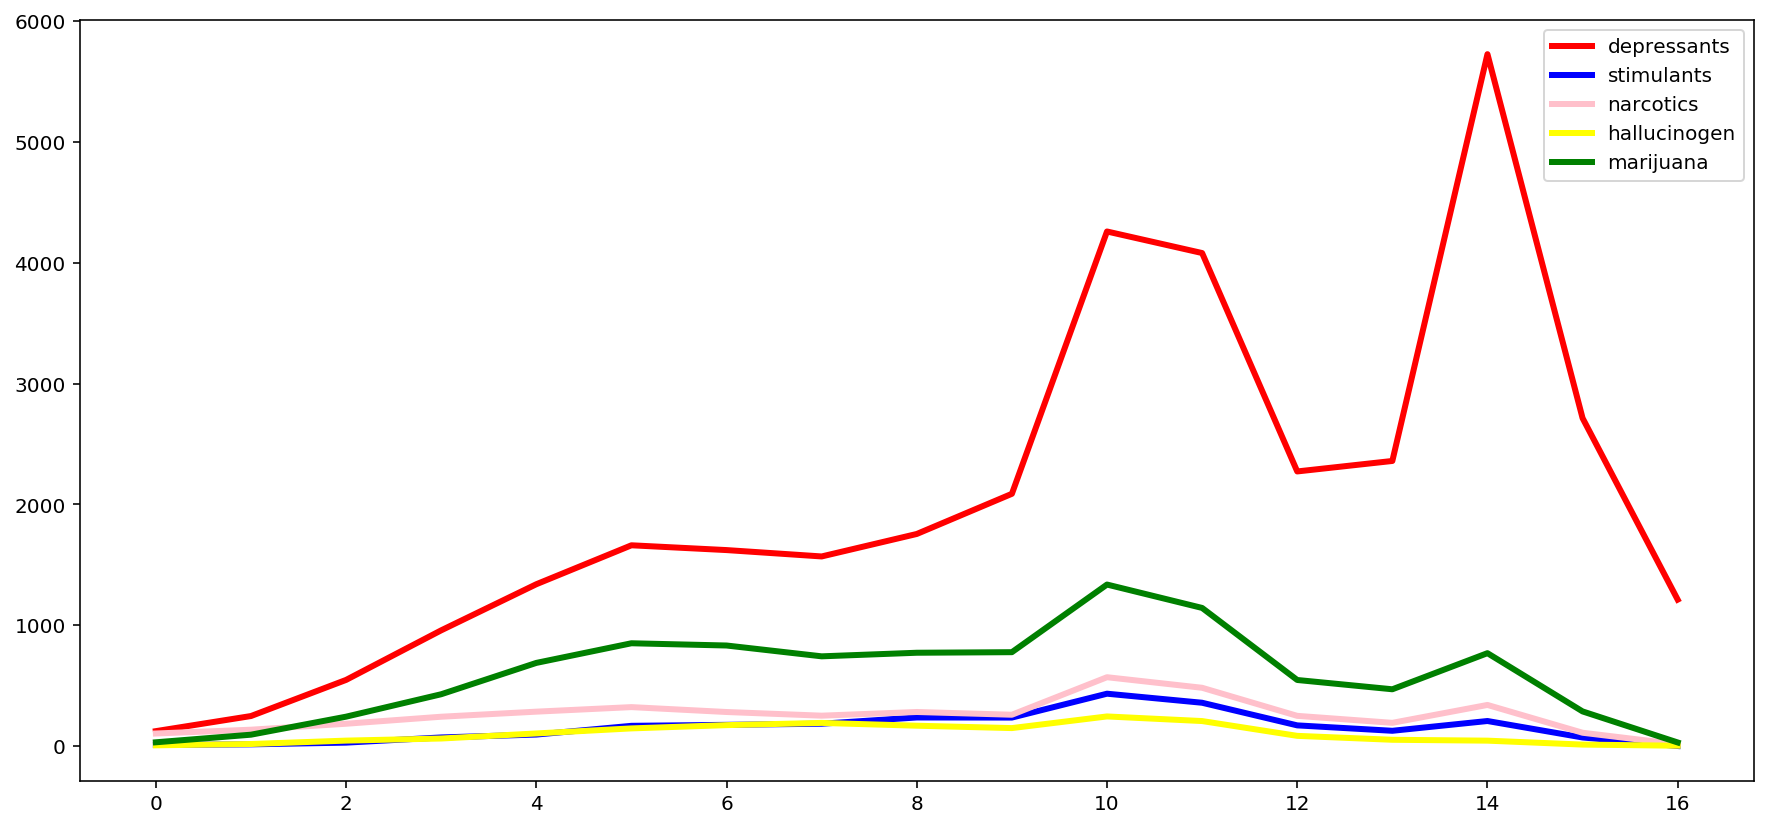

In [58]:
 # The consumption of different types of drug was plotted. It is clear that the depressants are the most consumed drug. 

derived_drug_u['depressants'].plot(c='red',linewidth=3, legend=True, figsize=(15,7))
derived_drug_u['stimulants'].plot(c='blue',linewidth=3, legend=True)
derived_drug_u['narcotics'].plot(c='pink',linewidth=3, legend=True)
derived_drug_u['hallucinogen'].plot(c='yellow',linewidth=3, legend=True)
derived_drug_u['marijuana'].plot(c='green',linewidth=3, legend=True)


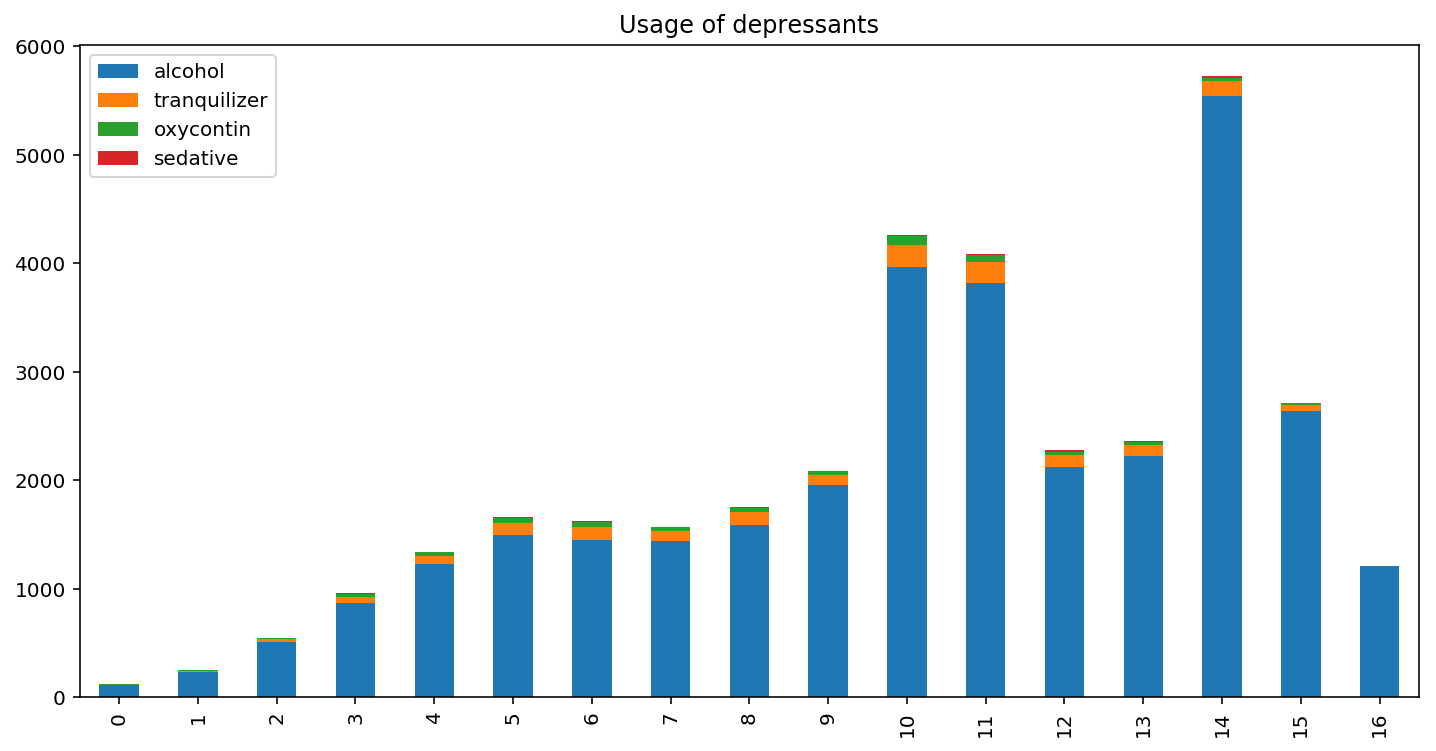

In [59]:
#From the plot below, it is clear that alcohol is the maximum used drug in the depressants type. 

depressants=pd.DataFrame({'alcohol':drug_u['alcohol_u'],'tranquilizer':drug_u['tranquilizer_u'],'oxycontin':drug_u['oxycontin_u'],'sedative':drug_u['sedative_u']})

depressants.plot(kind='bar',stacked=True,figsize=(12,6), title='Usage of depressants')

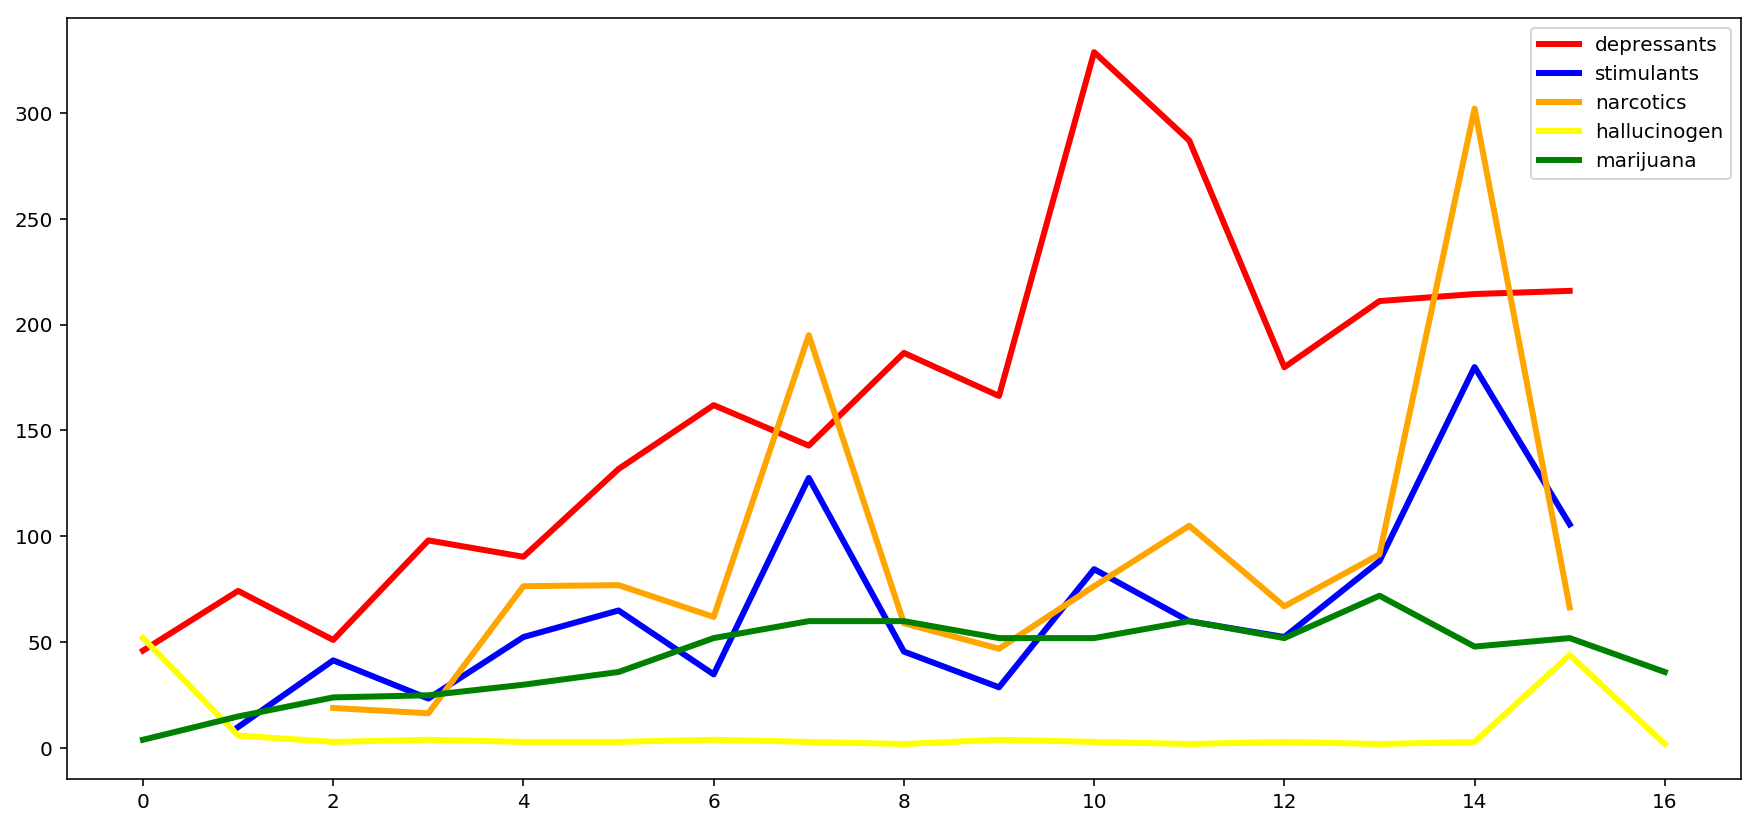

In [60]:
# The median time frequency consumption of different types of drug was calculated

derived_drug_f['depressants'].plot(c='red',linewidth=3, legend=True, figsize=(15,7))
derived_drug_f['stimulants'].plot(c='blue',linewidth=3, legend=True)
derived_drug_f['narcotics'].plot(c='orange',linewidth=3, legend=True)
derived_drug_f['hallucinogen'].plot(c='yellow',linewidth=3, legend=True)
derived_drug_f['marijuana'].plot(c='green',linewidth=3, legend=True)


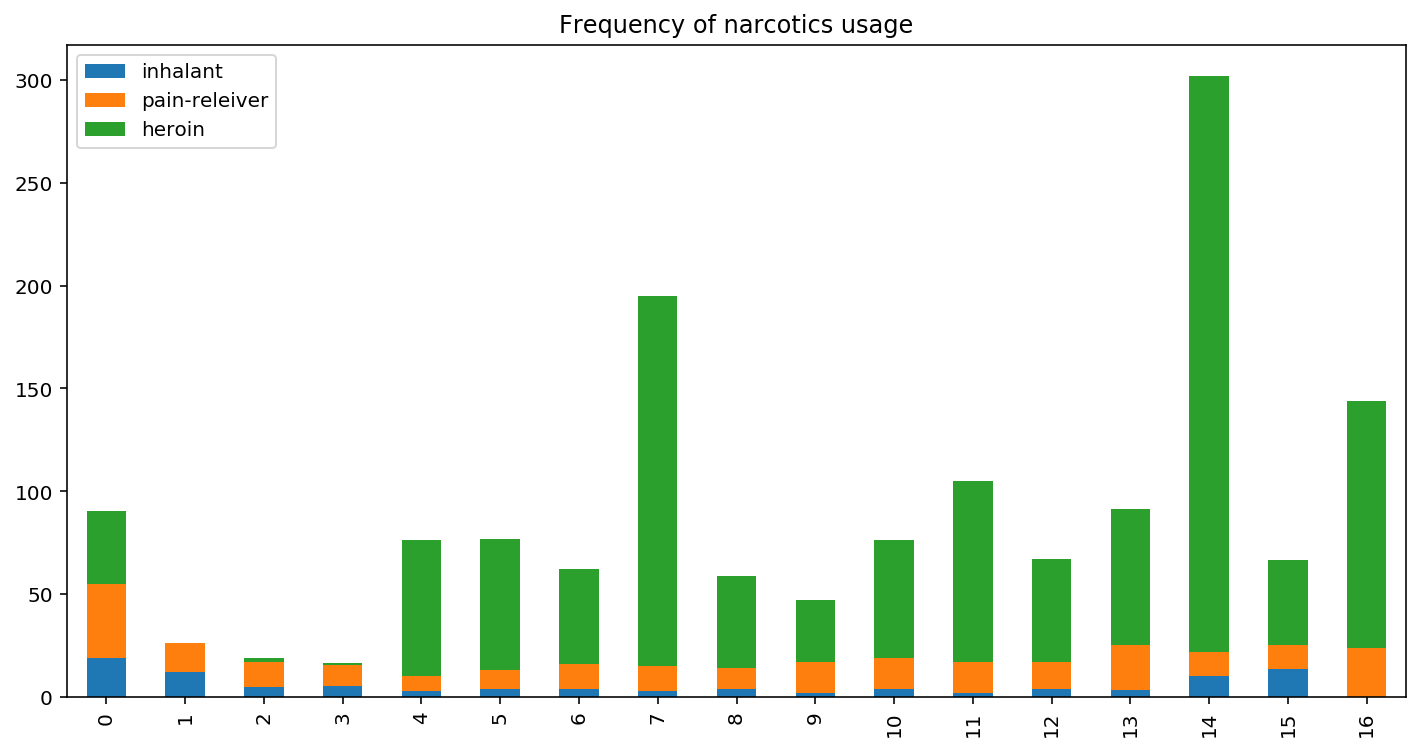

In [61]:
# A strange result was spotted in the graph above. We could find that the there was higher peaks of narcotics was observed. 
#Therefore the distribution of narcotic drug was studied. From the graph shown below, heroin usuage was maximum. 
# Further examination was done to locate the outliers.

narcotics=pd.DataFrame({'inhalant':drug_n['inhalant_f'],'pain-releiver':drug_n['pain-releiver_f'],'heroin':drug_n['heroin_f']})

narcotics.plot(kind='bar',stacked=True,figsize=(12,6), title='Frequency of narcotics usage')

Text(0.5,1,'Heroin Data Boxplot')

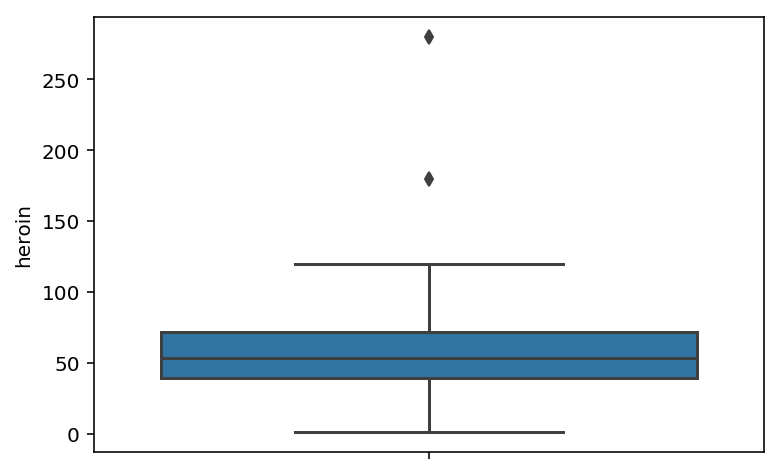

In [62]:
#The distribution of heroin was studied using boxplot. As seen in the figure we could expect some outliers
# in that data. 


sns.boxplot(x="heroin", data=narcotics,orient="v")
ax.set_ylabel('heroin',fontsize=16)
ax.set_title('Heroin Data Boxplot', fontsize=20)

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

In [63]:
# Spearman’s Rank Correlation test is done to find whether alcohol and tranquillizer samples have a monotonic relationship.

# The assumptions made were:

# Observations in each sample are independent and identically distributed (iid).
# Observations in each sample can be ranked.

# Interpretation:

# H0: the two samples are independent.
# H1: there is a dependency between the samples.

In [64]:
from scipy.stats import spearmanr
data1=depressants['alcohol']
data2=depressants['tranquilizer']
corr, p = spearmanr(data1, data2)
print('correlation coefficient=',corr)
print('p value=',p)

correlation coefficient= 0.7818627450980392
p value= 0.00020916180432210761


Report:

* p<0.05
* the correlation coefficient is positive(0.78), therefore there is a positive relationship between two samples
* we can reject the null hypothesis (H0)
* we can say that there is dependency between the two samples (alcohol and tranquilizer)


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

Text(0.5,1,'Rate_unclean Data Boxplot')

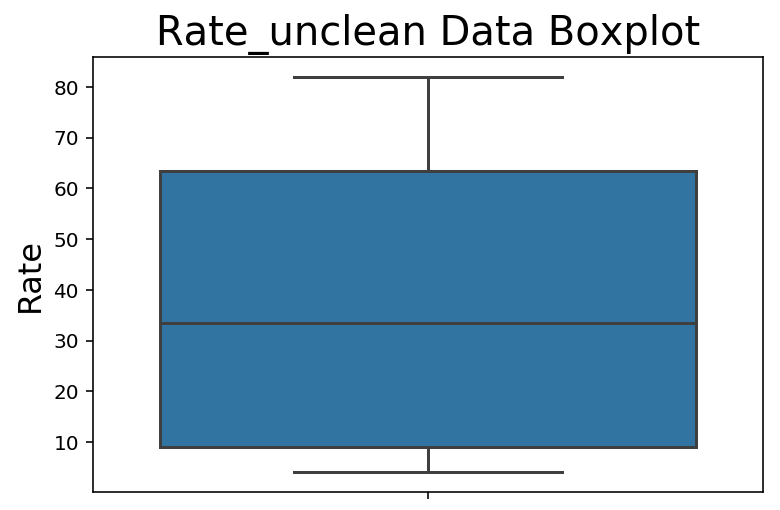

In [65]:
#8.1 The rate variable is taken from the sat_score for analysis of outliers. The Box plot is made to visualize the values. 


ax=sns.boxplot(x="Rate", data=sat_score,orient="v")
ax.set_ylabel('Rate',fontsize=16)
ax.set_title('Rate_unclean Data Boxplot', fontsize=20)


In [66]:
sat_score['Rate'].describe()

count    52.000000
mean     37.153846
std      27.301788
min       4.000000
25%       9.000000
50%      33.500000
75%      63.500000
max      82.000000
Name: Rate, dtype: float64

In [67]:
# 8.2 Outliers are defined as values that are very different from the most of the values in the data set. 
# It can be clearly seen that the rate variables have outliers.


In [68]:
#8.3 & 8.4 The outliers were  removed from the data set and clear data it stored in rate_value. The outliers were printed. 

rate=sat_score['Rate']
outliers=[]
rate_value=[]
for value in rate:
    if value > 63:
        outliers.append(value)
    elif value<9:
        outliers.append(value)
    else:
        rate_value.append(value)
        
print('Rate_outliers',outliers)

Rate_outliers [82, 81, 79, 77, 72, 71, 71, 69, 69, 68, 67, 65, 65, 8, 8, 8, 7, 6, 6, 5, 5, 4, 4, 4]


len of clean Rate Data= 28
Rate_clean_avg= 33.25


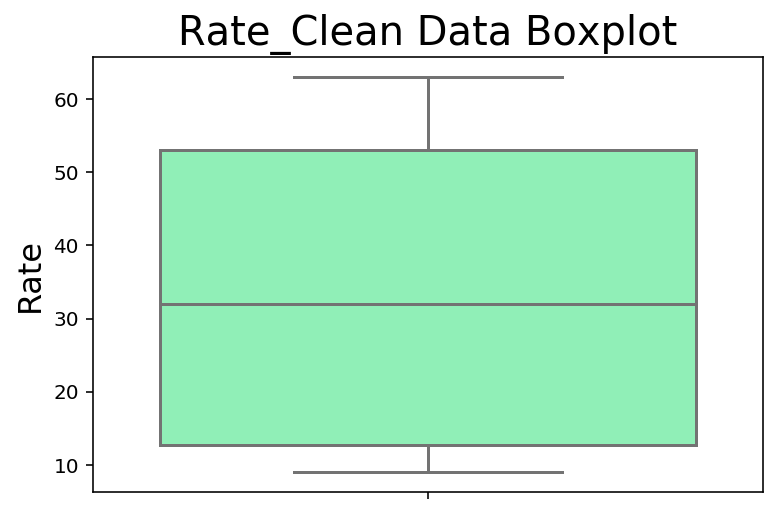

In [69]:
#8.5 The comparison between the clean and unclean rate dataset

rate_clean=pd.Series({'rate_c':rate_value})

#The boxplot was done using seabon to visualize the effect of the outliers in the 

ax=sns.boxplot(x='rate_c', data=rate_clean,orient="v",palette='rainbow')
ax.set_ylabel('Rate',fontsize=16)
ax.set_title('Rate_Clean Data Boxplot', fontsize=20)

Rate_clean_avg=sum(rate_value)/len(rate_value)

print('len of clean Rate Data=',len(rate_value))

print('Rate_clean_avg=',Rate_clean_avg)

#The mean value of the clean rate data is decreased from 37 to 33. 
# This is because the low outliers data values were removed from the data. 
# Since median is the 50 percentile value it will not be affected by the outlier points.



9. Percentile scoring and spearman rank correlation
9.1 Calculate the spearman correlation of sat Verbal and Math¶
How does the spearman correlation compare to the pearson correlation?
Describe clearly in words the process of calculating the spearman rank correlation.
Hint: the word "rank" is in the name of the process for a reason!

The Pearson correlation evaluates the linear relationship between two continuous variables. 
However, the Spearman correlation coefficient is based on the ranked values for each variable rather than the raw data.
Therefore Spearman correlation correlation is often used to evaluate relationships involving ordinal variables.

In [70]:
to_drop=['Rate','Verbal_minus_Math']
sat_score_n=sat_score.drop(to_drop,axis=1)

In [71]:
# pearson correlation of sat Verbal and Math scores

sat_score_n.corr(method='pearson', min_periods=1)



,Verbal,Math
Verbal,1.000000,0.899871
Math,0.899871,1.000000


In [72]:
# Spearman correlation of sat Verbal and Math scores
sat_score_n.corr(method='spearman', min_periods=1)


,Verbal,Math
Verbal,1.000000,0.905205
Math,0.905205,1.000000


### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [73]:
# The Rate_percentile column was added to sat_score dataframe. 
# Build-in function stats.percentileofscore is used to calculate the percentile score.

from scipy import stats
Rate_p=[]
for value in sat_score['Rate']:
    a=stats.percentileofscore(sat_score['Rate'], value)
    Rate_p.append(a)
sat_score['Rate_percentile']=Rate_p
sat_score.head()

# The rate percentile of California is 57 however its rate is 51. 
#Similar to the spearman, percentile is also based on rank among the data.

,State,Rate,Verbal,Math,Verbal_minus_Math,Rate_percentile
0,CT,82,509,510,-1,100.000000
1,NJ,81,499,513,-14,98.076923
2,MA,79,511,515,-4,96.153846
3,NY,77,495,505,-10,94.230769
4,NH,72,520,516,4,92.307692


### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

In [74]:
# The percentile score is based on the rank of the variable. 
# Therefore it used to standardise the values and efficiently remove the outliers. 

from scipy import stats
alcohol_p=[]
for value in depressants['alcohol']:
    a=stats.percentileofscore(depressants['alcohol'], value)
    alcohol_p.append(a)
depressants['alcohol_percentile']=alcohol_p
depressants



,alcohol,tranquilizer,oxycontin,sedative,alcohol_percentile
0,109.122,5.596,2.798,5.596,5.882353
1,234.345,8.271,2.757,2.757,11.764706
2,505.352,25.128,11.168,5.584,17.647059
3,863.152,59.120,23.648,11.824,23.529412
4,1226.258,73.392,33.638,6.116,35.294118
5,1497.734,106.330,42.532,15.190,52.941176
6,1449.303,120.981,41.973,9.876,47.058824
7,1436.058,93.366,33.345,6.669,41.176471
8,1582.887,122.634,38.607,11.355,58.823529
9,1958.528,91.806,30.602,7.062,64.705882


Text(0.5,1,'Alcohol Data Boxplot')

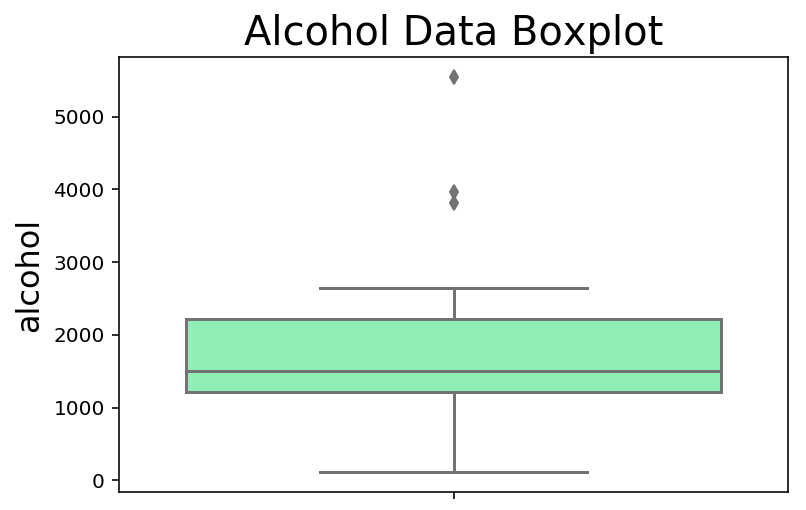

In [75]:
#The boxplot was done using seabon to visualize the effect of the outliers in the alcohol data

ax=sns.boxplot(x='alcohol',data=depressants,orient="v",palette='rainbow')
ax.set_ylabel('alcohol',fontsize=16)
ax.set_title('Alcohol Data Boxplot', fontsize=20)

Text(0.5,1,'Alcohol_percentile Data Boxplot')

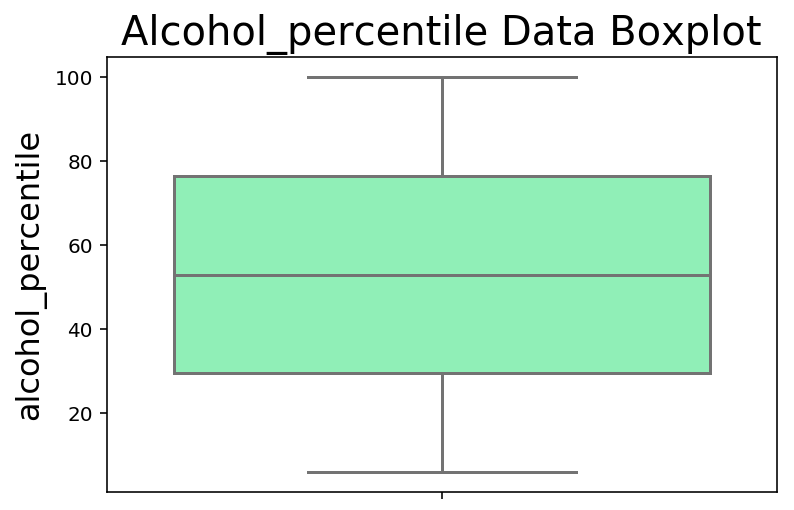

In [76]:
#The boxplot was done using seabon to visualize the alcohol_percentile plot. 

ax=sns.boxplot(x='alcohol_percentile',data=depressants,orient="v",palette='rainbow')
ax.set_ylabel('alcohol_percentile',fontsize=16)
ax.set_title('Alcohol_percentile Data Boxplot', fontsize=20)